# Microsoft Exploratory Film Insights


* Student name: Joe Garcia
* Student pace: full time
* Scheduled project review date/time: 3/11/2022, 11am
* Instructor name: Praveen Gowtham
* Blog post URL:

# OVERVIEW

Presenting to business partner, Microsoft, what would be the best practices to making a movie. They will lean how much budget to put in a movie, what kind of movie they should focus on, and what the general perception of a movie is taken by the audience.

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

- How does the overall budget impacts the final movie result?
- How does the general public receive the movies?
- What are the major traits per movie that they should follow?

In [94]:
#Here I combined all the DataFrame necessities such as matplotlib and seaborn, also with numpy for statistics

import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt 
from re import sub
from decimal import Decimal
import numpy as np
import seaborn as sns, operator as op
%matplotlib inline


#Here I unzipped the movie_basics.csv, and created a Pandas dataframe (df1)

movie_basics_df = pd.read_csv('zippedData/movie_basics_extracted.csv', index_col=False)
movie_basics_df.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [95]:
#Here I found out that the start year goes beyond, 2022 so I have to git rid of those.
movie_basics_df['start_year'].sort_values().tail()

2948     2024
52213    2025
2949     2026
96592    2027
89506    2115
Name: start_year, dtype: int64

In [96]:
#Limiting on the years that would be found
movie_basics_df= movie_basics_df[(movie_basics_df['start_year'] >= 2010) & (movie_basics_df['start_year'] <= 2022)]
movie_basics_df.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [97]:
#Dropping all the NaN values (.dropna()) 
genres_list = list(movie_basics_df['genres'].dropna())

#Making a blank unique_genre_names list in order to be used in the for loop
unique_genre_names = []


#Here I split every element in a row within genres_list, to find which names where by themselves

for i in genres_list:
    new_num = len(i.split(","))
    if new_num == 1 : #Just obtain the split  genres_list with one list  inside
        unique_genre_names.append(i)
    else:
        None

#Here is the list with one genre name  inside
unique_genre_names[:5]

['Drama', 'Comedy', 'Biography', 'Drama', 'History']

In [98]:
#Made a dictionary with the genres names equal to 0
unique_genre_names_dic={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic.update({word : 0})   
unique_genre_names_dic

{'Drama': 0,
 'Comedy': 0,
 'Biography': 0,
 'History': 0,
 'Documentary': 0,
 'Sci-Fi': 0,
 'Thriller': 0,
 'Horror': 0,
 'Action': 0,
 'Adventure': 0,
 'Fantasy': 0,
 'Musical': 0,
 'Western': 0,
 'Romance': 0,
 'Mystery': 0,
 'Crime': 0,
 'Animation': 0,
 'Family': 0,
 'Sport': 0,
 'Music': 0,
 'News': 0,
 'Talk-Show': 0,
 'Reality-TV': 0,
 'War': 0,
 'Game-Show': 0}

In [99]:
#Here I made a for loop that obtained all the Dictionary keys (Drama, Comedy, ect) and ran them with  all the words
#From the genres_list and added +1 for every word

for string_name in genres_list:
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    for word in string_list: # think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:  #if word is in the unique names dictionary, add 1 to the dictionary
            unique_genre_names_dic[word] = unique_genre_names_dic[word]+1

In [100]:
#Here I sorted the dictionary of genres by the number of movies (values)
sorted_genre_dict = dict(sorted(unique_genre_names_dic.items(),key=lambda x:x[1],reverse = True))


In [101]:
#Here I sorted the genre_dict values into a list 
genre_values_sorted_list = list(sorted_genre_dict.values())
top_genre_values_sorted = genre_values_sorted_list[:15]

In [102]:
#Here I sorted the genre_dict names 
genre_names_sorted_list = list(sorted_genre_dict.keys())
top_genre_names_sorted = genre_names_sorted_list[:15]

The graph shows us what is the key genre element per film, if they have some sort of element, then its marked down. Here we have discovered that most movies have an element of Documentary and Drama. We have discovered that Documentary, Drama, and Comedy are the top elements that compose all the movied.






Text(0, 0.5, 'Number of Movies')

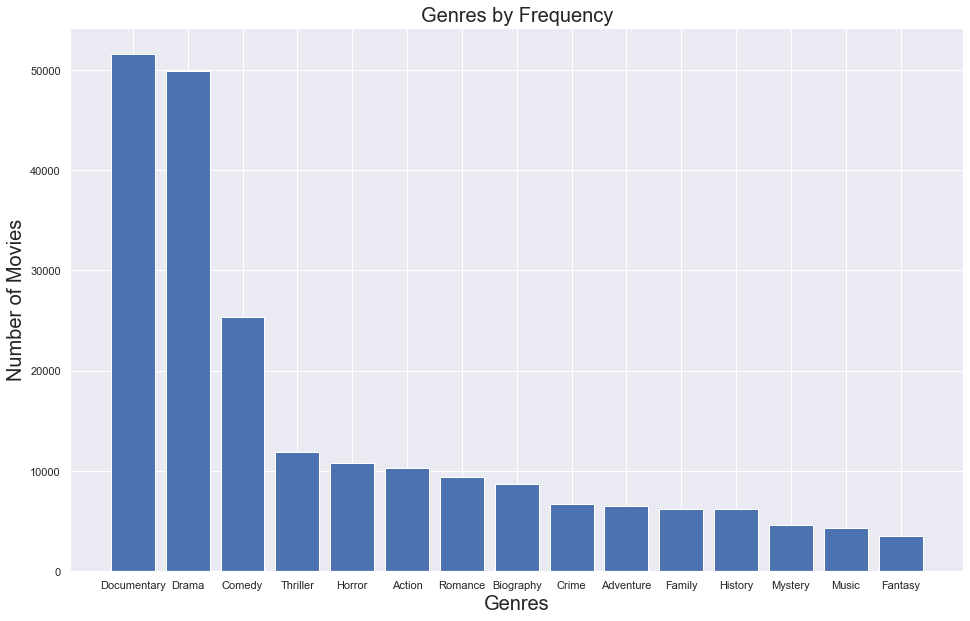

In [103]:
bar_chart_title = 'Genres by Frequency' 
bar_chart_count_label = 'Number of Movies'
bar_chart_series_label = 'Genres'


player_count_figure1, ax1 = plt.subplots(figsize=(16, 10))

ax1.bar(x = top_genre_names_sorted, height = top_genre_values_sorted ) 

ax1.set_title(bar_chart_title, fontsize = 20) 
ax1.set_xlabel(bar_chart_series_label, fontsize=20) 
ax1.set_ylabel(bar_chart_count_label, fontsize = 20)

In [104]:
#Here I managed to obtain the movie_budgets dataframe and made it into

movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [105]:
# changes money string to a simple def to change the money into a string
def change_money_to_float(money_string):
    float_value= float(Decimal(sub(r'[^\d.]', '', money_string)) )
    return float_value

In [106]:
#Getting the domestic_gross as a floating point rather than a string with the $, and creating a new dataframe column

domestic_gross_list =list(movie_budgets_df['domestic_gross'][0:])

domestic_gross_df4 = [ change_money_to_float(t) for t in domestic_gross_list] 

# Dropping old domestic_gross column and putting the new one in that has floats

columns_to_overwrite1 = ['domestic_gross']

movie_budgets_df.drop(labels=columns_to_overwrite1, axis="columns", inplace=True)

movie_budgets_df['domestic_gross'] = domestic_gross_df4

In [152]:
 #Here I got the worldwide list, even though I did not end up using it

worldwide_list =list(movie_budgets_df['worldwide_gross'][0:])

worldwide_gross_df4 = [ change_money_to_float(t) for t in worldwide_list]

# Doing the same to worldwide_gross

columns_to_overwrite2 = ['worldwide_gross']

movie_budgets_df.drop(labels=columns_to_overwrite2, axis="columns", inplace=True)

movie_budgets_df['worldwide_gross'] = worldwide_gross_df4

TypeError: expected string or bytes-like object

In [108]:
#Here I managed to create a new column with the movie_budgets_df

production_budget_list =list(movie_budgets_df['production_budget'][0:])

production_budget_df4 = [ change_money_to_float(t) for t in production_budget_list]

# Doing the same to production_budget

columns_to_overwrite3 = ['production_budget']

movie_budgets_df.drop(labels=columns_to_overwrite3, axis="columns", inplace=True)

movie_budgets_df['production_budget'] = production_budget_df4

In [109]:
#Here I just checked that the worldwide gross was a list, even though I did not end up using it
worldwide_prod_list = list(movie_budgets_df['worldwide_gross']/movie_budgets_df['production_budget'])
len(worldwide_prod_list)

5782

In [110]:
worldwide_prod_rounded = [round(worldwide_prod_list[x] , 4) for x in list(range(0,len(worldwide_prod_list)))]

sorted(worldwide_prod_rounded, reverse = True)

[1800.0,
 498.75,
 431.5179,
 416.5647,
 413.8333,
 342.0586,
 312.3543,
 291.704,
 263.9216,
 225.0,
 215.3846,
 208.5301,
 189.8031,
 180.1802,
 164.5827,
 155.4909,
 144.2311,
 125.0,
 124.2779,
 122.5,
 120.2751,
 115.3464,
 115.3068,
 111.0373,
 108.6447,
 102.4316,
 101.7595,
 101.3333,
 100.1347,
 100.0,
 95.576,
 90.8936,
 89.7959,
 89.5863,
 86.5667,
 78.4,
 75.5205,
 74.978,
 74.6427,
 71.5089,
 70.1459,
 68.8017,
 67.378,
 66.9466,
 66.5806,
 64.585,
 64.3642,
 63.1191,
 61.2158,
 60.6204,
 59.7015,
 59.567,
 59.1707,
 57.5085,
 55.793,
 55.4583,
 53.9768,
 53.3699,
 53.3659,
 52.2862,
 51.0736,
 47.9026,
 47.2,
 46.707,
 45.9615,
 44.8957,
 43.497,
 42.4117,
 41.6333,
 41.408,
 40.7857,
 40.5985,
 40.0825,
 40.0,
 39.5174,
 39.45,
 39.225,
 39.1989,
 38.9811,
 38.3571,
 37.6,
 37.2959,
 36.8582,
 36.8243,
 36.6667,
 36.5439,
 36.1702,
 35.8763,
 35.6845,
 35.6322,
 34.9042,
 34.4835,
 34.0,
 33.3333,
 33.0929,
 33.0643,
 32.3843,
 31.779,
 31.0163,
 30.9033,
 30.8214,
 30.6

In [111]:
#Here I did not end up using the ROI for worldwide 
movie_budgets_df['ROI for WorldWide'] = worldwide_prod_rounded

In [112]:
#so trying to display worldwide_ROI 

movie_budgets_df.sort_values( by= "ROI for WorldWide", ascending = False).head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide
5745,46,"Jun 30, 1972",Deep Throat,45000000.0,45000000.0,25000.0,1800.0000
5613,14,"Mar 21, 1980",Mad Max,8750000.0,99750000.0,200000.0,498.7500
5492,93,"Sep 25, 2009",Paranormal Activity,107918810.0,194183034.0,450000.0,431.5179
5679,80,"Jul 10, 2015",The Gallows,22764410.0,41656474.0,100000.0,416.5647
5406,7,"Jul 14, 1999",The Blair Witch Project,140539099.0,248300000.0,600000.0,413.8333


In [113]:
#Here is the domesticgross ROI that I managed to get, and saw how many rows the final product was

dom_prod_list = list(movie_budgets_df['domestic_gross']/movie_budgets_df['production_budget'])
len(dom_prod_list)

5782

In [114]:
#Here I ended up rounding the domestic_product_list because it gave me a large decimal

dom_prod_list_rounded = [round(dom_prod_list[x] , 4) for x in list(range(0,len(dom_prod_list)))]

sorted_rounded_list = sorted(dom_prod_list_rounded[0:10], reverse = True)
sorted_rounded_list

[3.061, 2.2627, 1.9564, 1.7894, 1.3884, 1.0314, 0.7634, 0.6669, 0.5871, 0.1222]

In [115]:
movie_budgets_df['ROI for Domestic'] = dom_prod_list_rounded

In [116]:
# look at df4 again
movie_budgets_df.head()


,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
0,1,"Dec 18, 2009",Avatar,760507625.0,2.776345e+09,425000000.0,6.5326,1.7894
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871
2,3,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222
3,4,"May 1, 2015",Avengers: Age of Ultron,459005868.0,1.403014e+09,330600000.0,4.2438,1.3884
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,620181382.0,1.316722e+09,317000000.0,4.1537,1.9564


In [117]:
# filtering out the ones where ROI for domestic column is 0
movie_budgets_df = movie_budgets_df[movie_budgets_df['ROI for Domestic'] != 0.0]

In [118]:
# look at df4 now

#df4.sort_values(by='ROI for Domestic').head(50)
movie_budgets_df.sort_values(by='ROI for Domestic').head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
2003,4,"Feb 21, 2008",Genghis Khan: To the Ends of the Earth and Sea,3892.0,4874498.0,30000000.0,0.1625,0.0001
2004,5,"Jan 30, 2015",Wild Card,3200.0,4315789.0,30000000.0,0.1439,0.0001
4081,82,"May 21, 2010",Perrierâs Bounty,828.0,828.0,6600000.0,0.0001,0.0001
3818,19,"May 8, 2015",Skin Trade,1242.0,1242.0,9000000.0,0.0001,0.0001
1767,68,"Sep 5, 2014",Thunder and the House of Magic,4091.0,62582520.0,34000000.0,1.8407,0.0001


In [119]:
# filter out the movies where the ROI for domestic is too little (0.1) or too large (>1000)

df4_ROIcropped = movie_budgets_df[ (movie_budgets_df['ROI for Domestic'] >=0.1) & (movie_budgets_df['ROI for Domestic'] < 50.0)]

In [149]:
#The ROI cropped with the production budget 

df4_productioncropped = df4_ROIcropped [ df4_ROIcropped ['production_budget'] < 2e8]

Here is my second graph, getting the ROI (Return On Investment) compared to the budget

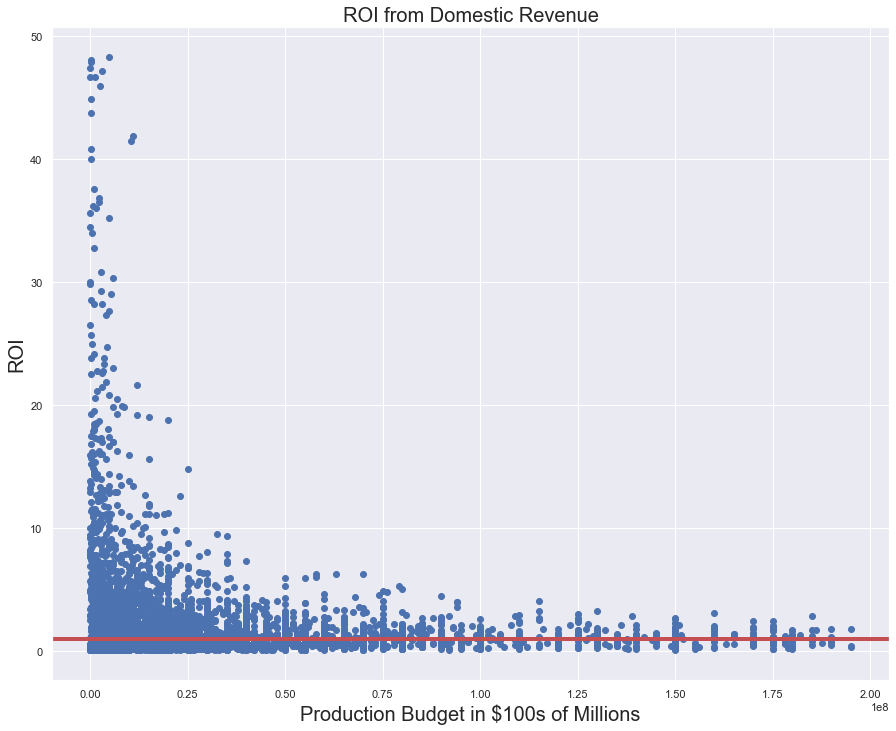

In [122]:
player_count_figure3, ax = plt.subplots(figsize=(15, 12))

plt.scatter(df4_productioncropped['production_budget'], df4_productioncropped['ROI for Domestic'])
plt.xlabel('Production Budget in $100s of Millions',fontsize = 20)
plt.ylabel('ROI', fontsize = 20)
plt.title('ROI from Domestic Revenue',fontsize = 20 )


plt.axhline(y=1, color='r', linestyle='-', linewidth=4)

plt.show()

In [123]:
movie_budgets_df.sort_values(by='production_budget').head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
5781,82,"Aug 5, 2005",My Date With Drew,181041.0,181041.0,1100.0,164.5827,164.5827
5779,80,"Jul 13, 2005",Return to the Land of Wonders,1338.0,1338.0,5000.0,0.2676,0.2676
5778,79,"Apr 2, 1999",Following,48482.0,240495.0,6000.0,40.0825,8.0803
5773,74,"Feb 26, 1993",El Mariachi,2040920.0,2041928.0,7000.0,291.7040,291.5600
5776,77,"Dec 31, 2004",The Mongol King,900.0,900.0,7000.0,0.1286,0.1286


In [124]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5232 non-null   int64  
 1   release_date       5232 non-null   object 
 2   movie              5232 non-null   object 
 3   domestic_gross     5232 non-null   float64
 4   worldwide_gross    5232 non-null   float64
 5   production_budget  5232 non-null   float64
 6   ROI for WorldWide  5232 non-null   float64
 7   ROI for Domestic   5232 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 367.9+ KB


In [125]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
domestic_gross       0
worldwide_gross      0
production_budget    0
ROI for WorldWide    0
ROI for Domestic     0
dtype: int64

In [126]:
# the losers made less than 1x their money back

losers_df = movie_budgets_df[ (movie_budgets_df['ROI for Domestic'] < 1.0)]
losers_df

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871
2,3,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222
8,9,"Nov 17, 2017",Justice League,229024295.0,6.559452e+08,300000000.0,2.1865,0.7634
9,10,"Nov 6, 2015",Spectre,200074175.0,8.796209e+08,300000000.0,2.9321,0.6669
11,12,"May 25, 2018",Solo: A Star Wars Story,213767512.0,3.931513e+08,275000000.0,1.4296,0.7773
...,...,...,...,...,...,...,...,...
5769,70,"Apr 1, 1996",Bang,527.0,5.270000e+02,10000.0,0.0527,0.0527
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,401.0,4.010000e+02,10000.0,0.0401,0.0401
5772,73,"Jan 13, 2012",Newlyweds,4584.0,4.584000e+03,9000.0,0.5093,0.5093
5776,77,"Dec 31, 2004",The Mongol King,900.0,9.000000e+02,7000.0,0.1286,0.1286


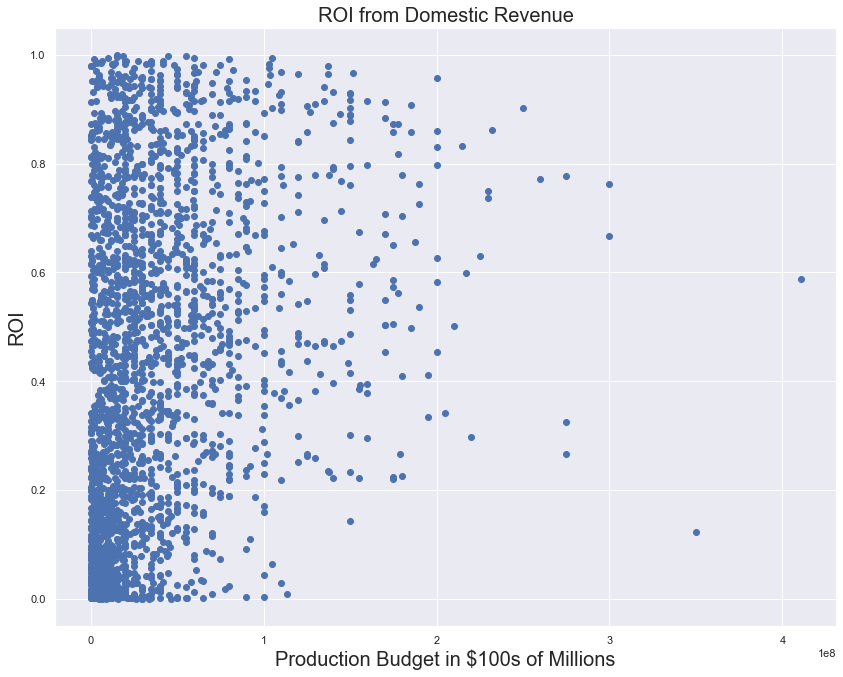

In [127]:
player_count_figure3, ax1 = plt.subplots(figsize=(14, 11))

plt.scatter(losers_df['production_budget'], losers_df['ROI for Domestic'])
plt.xlabel('Production Budget in $100s of Millions',fontsize = 20)
plt.ylabel('ROI',fontsize = 20)
plt.title('ROI from Domestic Revenue',fontsize = 20)
plt.show()


In [128]:
#Here I unzipped the the movie_ratings.csv and created a Pandas dataframe (df2)
movie_ratings = pd.read_csv('zippedData/movie_ratings_extracted.csv')
movie_ratings.head()

,Unnamed: 0,movie_id,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


In [129]:
#Here I unzipped the movie_basics.csv, and created a Pandas dataframe (df1)

movie_basics = pd.read_csv('zippedData/movie_basics_extracted.csv', index_col=False).tail(50)
movie_basics.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146094,146094,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy
146095,146095,tt9909086,Pheriaa Come Back,Pheriaa Come Back,2018,137.0,Drama
146096,146096,tt9909228,Ximei,Ximei,2019,98.0,Documentary
146097,146097,tt9909424,Razreshite tebya potselovat... Otets nevesty,Razreshite tebya potselovat... Otets nevesty,2014,90.0,Comedy
146098,146098,tt9909650,Hellbiro,Hellbiro,2018,95.0,Comedy


In [130]:
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='outer')
merged_df.head()


,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,146094.0,tt9908960,Pliusas,Pliusas,2018.0,90.0,Comedy,42169.0,4.2,13.0
1,146095.0,tt9909086,Pheriaa Come Back,Pheriaa Come Back,2018.0,137.0,Drama,NaN,NaN,NaN
2,146096.0,tt9909228,Ximei,Ximei,2019.0,98.0,Documentary,NaN,NaN,NaN
3,146097.0,tt9909424,Razreshite tebya potselovat... Otets nevesty,Razreshite tebya potselovat... Otets nevesty,2014.0,90.0,Comedy,NaN,NaN,NaN
4,146098.0,tt9909650,Hellbiro,Hellbiro,2018.0,95.0,Comedy,NaN,NaN,NaN


In [131]:
merged_sorted = merged_df.sort_values(by = 'movie_id')

In [132]:
merged_sorted.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
36096,NaN,tt0063540,NaN,NaN,NaN,NaN,NaN,36049.0,7.0,77.0
775,NaN,tt0066787,NaN,NaN,NaN,NaN,NaN,725.0,7.2,43.0
18476,NaN,tt0069049,NaN,NaN,NaN,NaN,NaN,18429.0,6.9,4517.0
2273,NaN,tt0069204,NaN,NaN,NaN,NaN,NaN,2223.0,6.1,13.0
1193,NaN,tt0100275,NaN,NaN,NaN,NaN,NaN,1143.0,6.5,119.0


In [133]:
merged_sorted['movie_id'].duplicated().sum()

0

In [134]:
merged_sorted.shape

(73896, 10)

In [135]:
merged_sorted.isna().sum()

Unnamed: 0_x       73846
movie_id               0
primary_title      73846
original_title     73846
start_year         73846
runtime_minutes    73866
genres             73849
Unnamed: 0_y          40
averagerating         40
numvotes              40
dtype: int64

In [136]:
#Dropped the NaNs for the averagerating in the merged_sorted DataFrame
merged_sorted['averagerating'].dropna()

36096    7.0
775      7.2
18476    6.9
2273     6.1
1193     6.5
        ... 
21       6.2
28       8.7
31       8.5
35       6.6
40       6.5
Name: averagerating, Length: 73856, dtype: float64

In [137]:
#Dropped the NaNs in the merged_sorted DataFrame
merged_sorted_cleaned = merged_sorted.dropna()
merged_sorted_cleaned.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,146094.0,tt9908960,Pliusas,Pliusas,2018.0,90.0,Comedy,42169.0,4.2,13.0
9,146103.0,tt9910502,Hayatta Olmaz,Hayatta Olmaz,2019.0,97.0,Comedy,16094.0,7.0,9.0
14,146108.0,tt9910930,Jeg ser deg,Jeg ser deg,2019.0,75.0,"Crime,Documentary",5921.0,6.1,7.0
19,146113.0,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019.0,130.0,Drama,52437.0,8.4,365.0
20,146114.0,tt9913056,Swarm Season,Swarm Season,2019.0,86.0,Documentary,7448.0,6.2,5.0


In [151]:
genres_list = list(merged_sorted_cleaned['genres'].dropna())
genres_list[:5]

['Comedy', 'Comedy', 'Crime,Documentary', 'Drama', 'Documentary']

In [139]:
unique_genre_names = []

for i in genres_list:
    new_num = len(i.split(","))
    if new_num == 1 :
        unique_genre_names.append(i)
    else:
        None
unique_genre_names[:5]

['Comedy', 'Comedy', 'Drama', 'Documentary', 'Documentary']

In [140]:
unique_genre_names_dic={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic.update({word : []})   
unique_genre_names_dic.keys()

dict_keys(['Comedy', 'Drama', 'Documentary'])

In [141]:
unique_genre_names_dic.values()

dict_values([[], [], []])

In [142]:
merged_sorted_cleaned.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,146094.0,tt9908960,Pliusas,Pliusas,2018.0,90.0,Comedy,42169.0,4.2,13.0
9,146103.0,tt9910502,Hayatta Olmaz,Hayatta Olmaz,2019.0,97.0,Comedy,16094.0,7.0,9.0
14,146108.0,tt9910930,Jeg ser deg,Jeg ser deg,2019.0,75.0,"Crime,Documentary",5921.0,6.1,7.0
19,146113.0,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019.0,130.0,Drama,52437.0,8.4,365.0
20,146114.0,tt9913056,Swarm Season,Swarm Season,2019.0,86.0,Documentary,7448.0,6.2,5.0


In [143]:
averagerating_list = list(merged_sorted_cleaned['averagerating'])
averagerating_list[0]

4.2

In [144]:
for i in range(0, len(genres_list)):
    string_name = genres_list[i]
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    
    for word in string_list:# think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:
            unique_genre_names_dic[word].append(averagerating_list[i])

In [145]:
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Talk-Show'}
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Reality-TV'}
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Game-Show'}


In [146]:
unique_genre_names_dic

{'Comedy': [4.2, 7.0],
 'Drama': [8.4, 8.7],
 'Documentary': [6.1, 6.2, 6.2, 6.5]}

ValueError: The number of FixedLocator locations (22), usually from a call to set_ticks, does not match the number of ticklabels (3).

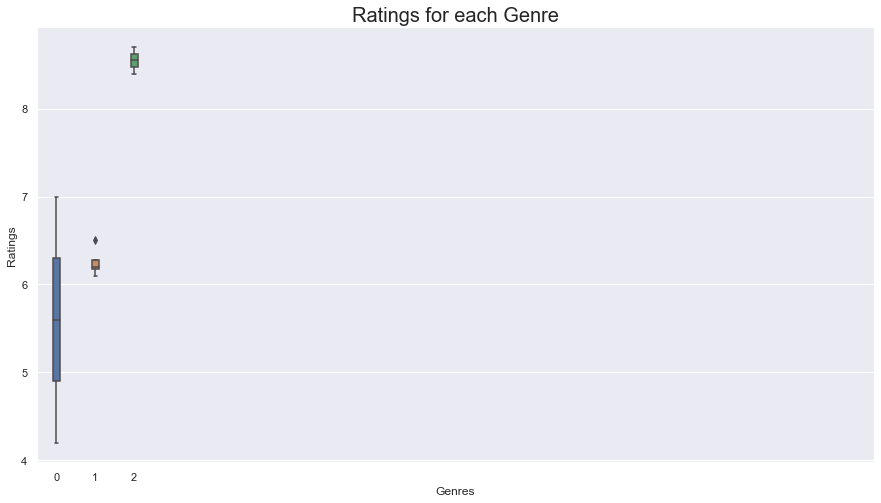

In [147]:
sorted_keys, sorted_vals = zip(*sorted(unique_genre_names_dic.items(), key=op.itemgetter(1)))

sns.set(context='notebook', style='whitegrid')


sns.set(rc = {'figure.figsize':(15,8)})

plot = sns.boxplot(data = sorted_vals ,  width = .18 ).set(
    xlabel='Genres', 
    ylabel='Ratings')



plt.title('Ratings for each Genre',fontsize = 20)

plt.xticks(np.arange(0,22), list(sorted_keys), rotation=60,fontsize = 20) 

plt.show()

ValueError: setting an array element with a sequence.

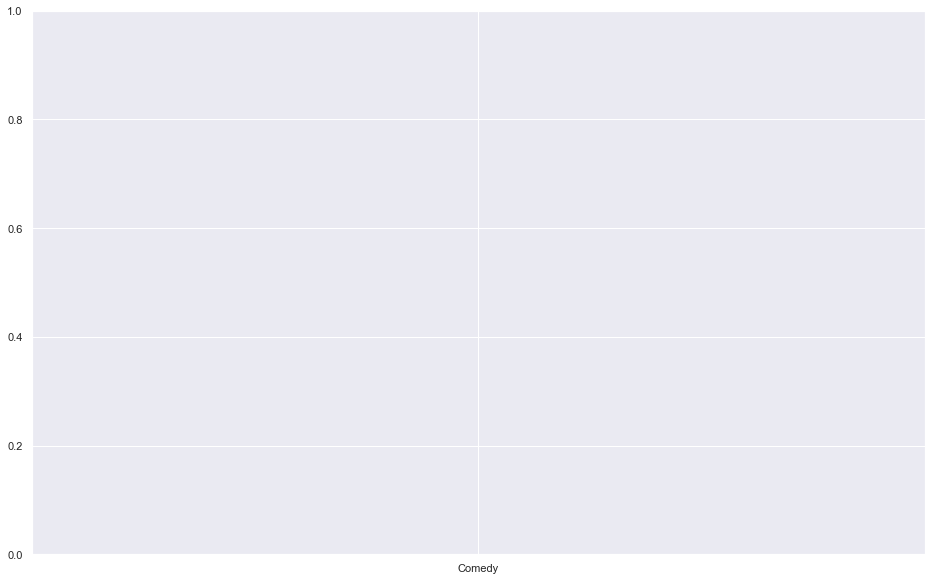

In [148]:
bar_chart_title = 'Ratings per Genre and ROI' 
bar_chart_count_label = 'Ratings'
bar_chart_series_label = 'Genres'


player_count_figure1, ax1 = plt.subplots(figsize=(16, 10))

ax1.bar(x = sorted_keys, height =  sorted_vals) 

ax1.set_title(bar_chart_title, fontsize = 20) 
ax1.set_xlabel(bar_chart_series_label, fontsize=20) 
ax1.set_ylabel(bar_chart_count_label, fontsize = 20)